In [1]:
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Tahoma','Lucida Grande','Verdana', 'DejaVu Sans']

pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue,
                                          pynbody.halo.hop.HOPCatalogue]


simname = 'h148'
s = pynbody.load('../../Data3/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096')
#simname = 'h229'
#s = pynbody.load('../Sims/h229.cosmo50PLK.3072gst5HbwK1BH/h229.cosmo50PLK.3072gst5HbwK1BH.004096/h229.cosmo50PLK.3072gst5HbwK1BH.004096')
#simname = 'h242'
#s = pynbody.load('../Sims/h242.cosmo50PLK.3072gst5HbwK1BH/h242.cosmo50PLK.3072gst5HbwK1BH.004096/h242.cosmo50PLK.3072gst5HbwK1BH.004096')
#simname = 'h329'
#s = pynbody.load('../Sims/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096')

h = s.halos()

In [112]:
sat_SM = []
sat_Z = []
host_SM = []
host_Z = []


for i in range(1,len(h)): 
    if not h[i].properties['n_star'] == 0:
        sm = h[i].star.properties['M_star']
        halo = h.load_copy(i)
        halo.physical_units()
        z = np.sum(halo.stars['metals']*halo.stars['mass'])/halo.stars['mass'].sum()
        print(str(i)+": stellar mass",sm,'metallicity',z)
        if h[i].properties['hostHalo'] == -1:
            host_SM.append(sm) # add back to magnitude list
            host_Z.append(z)
        else:
            sat_SM.append(sm)
            sat_Z.append(z)
    
sat_SM  = np.array(sat_SM,dtype='float32')
sat_Z   = np.array(sat_Z,dtype='float32')
host_SM = np.array(host_SM,dtype='float32')
host_Z  = np.array(host_Z,dtype='float32')

1: stellar mass 131026000000.0 metallicity 0.031064076565982757
2: stellar mass 1537420000.0 metallicity 0.004471985894649972
3: stellar mass 1018930000.0 metallicity 0.00446005829177357
5: stellar mass 292588000.0 metallicity 0.00260866737742371
6: stellar mass 224699000.0 metallicity 0.002241363743679699
7: stellar mass 20962300.0 metallicity 0.0044847575556253615
9: stellar mass 159888000.0 metallicity 0.002337122299814008
10: stellar mass 16621500.0 metallicity 0.001045169016379225
11: stellar mass 91704700.0 metallicity 0.001557212441452194
12: stellar mass 70728400.0 metallicity 0.0014040333467877824
13: stellar mass 41925300.0 metallicity 0.003291188115996225
14: stellar mass 8412860.0 metallicity 0.0008585273065773675
17: stellar mass 21390.5 metallicity 4.88458070284078e-05
18: stellar mass 2780090.0 metallicity 0.0005459938941747727
20: stellar mass 6818410.0 metallicity 0.001153801772133597
21: stellar mass 27942400.0 metallicity 0.003109313874282957
22: stellar mass 2090460

In [117]:
import pandas as pd
name = "simple_metallicity_calculation"
df = pd.DataFrame({"sat_SM" : sat_SM, "sat_Z" : sat_Z})
df.to_csv(name+"_sat.csv", index=False)
df = pd.DataFrame({"host_SM": host_SM, "host_Z": host_Z})
df.to_csv(name+"_host.csv", index=False)

In [118]:
colnames = ['sat_SM', 'sat_Z']
data = pd.read_csv(name+"_sat.csv", names=colnames)
sat_SM  = np.array(data.sat_SM.tolist()[1:],  dtype='float32')
sat_Z   = np.array(data.sat_Z.tolist()[1:],   dtype='float32')
colnames = ['host_SM', 'host_Z']
data = pd.read_csv(name+"_host.csv", names=colnames)
host_SM = np.array(data.host_SM.tolist()[1:], dtype='float32')
host_Z  = np.array(data.host_Z.tolist()[1:],  dtype='float32')

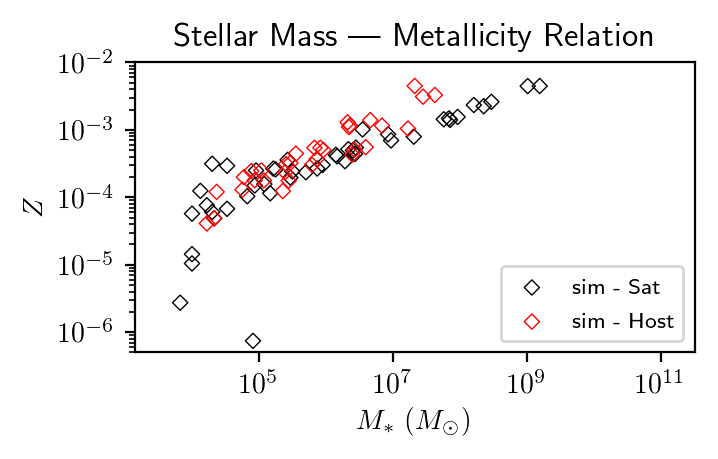

In [122]:
mpl.rc('text', usetex=True)

plt.figure(figsize=(4,2.5),dpi=200)
plt.scatter(sat_SM,sat_Z,marker='D',linewidth=0.5,s=15,facecolors='none',edgecolors='k',label='sim - Sat')
plt.scatter(host_SM,host_Z,marker='D',linewidth=0.5,s=15,facecolors='none',edgecolors='r',label='sim - Host')
plt.loglog()
plt.ylim(5e-7,1e-2)
plt.xlabel(r'$M_* \ (M_{\odot})$')
plt.ylabel(r'$Z$')
plt.title('Stellar Mass — Metallicity Relation')
plt.legend(loc=4,prop={'size': 8})
plt.gcf().subplots_adjust(bottom=0.3)
plt.gcf().subplots_adjust(left=0.2)
plt.savefig('smz_simp.png',dpi=300)
plt.show()

In [14]:
import pynbody
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Tahoma','Lucida Grande','Verdana', 'DejaVu Sans']

pynbody.config['halo-class-priority'] =  [pynbody.halo.ahf.AHFCatalogue,
                                          pynbody.halo.GrpCatalogue,
                                          pynbody.halo.AmigaGrpCatalogue,
                                          pynbody.halo.legacy.RockstarIntermediateCatalogue,
                                          pynbody.halo.rockstar.RockstarCatalogue,
                                          pynbody.halo.subfind.SubfindCatalogue,
                                          pynbody.halo.hop.HOPCatalogue]


#simname = 'h148'
#s = pynbody.load('../../Data3/h148.cosmo50PLK.3072g3HbwK1BH/h148.cosmo50PLK.3072g3HbwK1BH.004096/h148.cosmo50PLK.3072g3HbwK1BH.004096')
simname = 'h229'
s = pynbody.load('../Sims/h229.cosmo50PLK.3072gst5HbwK1BH/h229.cosmo50PLK.3072gst5HbwK1BH.004096/h229.cosmo50PLK.3072gst5HbwK1BH.004096')
#simname = 'h242'
#s = pynbody.load('../Sims/h242.cosmo50PLK.3072gst5HbwK1BH/h242.cosmo50PLK.3072gst5HbwK1BH.004096/h242.cosmo50PLK.3072gst5HbwK1BH.004096')
#simname = 'h329'
#s = pynbody.load('../Sims/h329.cosmo50PLK.3072gst5HbwK1BH/h329.cosmo50PLK.3072gst5HbwK1BH.004096/h329.cosmo50PLK.3072gst5HbwK1BH.004096')

h = s.halos()

In [17]:
sat_SM = []
sat_Z = []
host_SM = []
host_Z = []


for i in range(1,len(h)): 
    if not h[i].properties['n_star'] == 0:
        sm = h[i].star.properties['M_star']
        print(str(i)+": stellar mass: "+str(sm),end=" ")
        halo = h.load_copy(i)
        halo.physical_units()
        
        try:
            z = np.sum(halo.star['feh'] * halo.star['mass'])/sm
        except ValueError:
            continue 
            
        print('metallicity: '+str(z))
        if h[i].properties['hostHalo'] == -1:
            host_SM.append(sm) 
            host_Z.append(z)
        else:
            sat_SM.append(sm)
            sat_Z.append(z)
    
sat_SM  = np.array(sat_SM,dtype='float32')
sat_Z   = np.array(sat_Z,dtype='float32')
host_SM = np.array(host_SM,dtype='float32')
host_Z  = np.array(host_Z,dtype='float32')

1: stellar mass: 69154400000.0 metallicity: -0.2588325196946969
2: stellar mass: 564309000.0 metallicity: -1.3679165156053215
3: stellar mass: 155334000.0 metallicity: -1.1181322270457466
4: stellar mass: 23650100.0 metallicity: -2.4046876520758342
7: stellar mass: 16782200.0 metallicity: -2.4099614058285144
14: stellar mass: 3828240.0 metallicity: -1.986647168492602
16: stellar mass: 116600 metallicity: -7.918609363324607
17: stellar mass: 2262350.0 metallicity: -3.0643038248513736
18: stellar mass: 15939.7 metallicity: -3.9290671850119563
19: stellar mass: 1758140.0 metallicity: -2.507787898650561
21: stellar mass: 52283800.0 metallicity: -2.1704810550663813
22: stellar mass: 583547 metallicity: -5.590502335679313
25: stellar mass: 480568 metallicity: -3.2808108632168866
27: stellar mass: 3243820.0 metallicity: -3.1829435665900307
28: stellar mass: 2761710.0 metallicity: -2.4004507542260516
29: stellar mass: 977249 30: stellar mass: 924350 metallicity: -2.892339747173452
33: stellar 

In [18]:
import pandas as pd
name = "../csvs/feh_metallicity_%s" % simname
df = pd.DataFrame({"sat_SM" : sat_SM, "sat_Z" : sat_Z})
df.to_csv(name+"_sat.csv", index=False)
df = pd.DataFrame({"host_SM": host_SM, "host_Z": host_Z})
df.to_csv(name+"_host.csv", index=False)

In [19]:
colnames = ['sat_SM', 'sat_Z']
data = pd.read_csv(name+"_sat.csv", names=colnames)
sat_SM  = np.array(data.sat_SM.tolist()[1:],  dtype='float32')
sat_Z   = np.array(data.sat_Z.tolist()[1:],   dtype='float32')
colnames = ['host_SM', 'host_Z']
data = pd.read_csv(name+"_host.csv", names=colnames)
host_SM = np.array(data.host_SM.tolist()[1:], dtype='float32')
host_Z  = np.array(data.host_Z.tolist()[1:],  dtype='float32')

In [20]:
## Milky Way Data from Kirby et. al. 2013
Kirby_logSM = np.array([7.39,6.69,6.59,6.07,5.84,5.73,5.51,5.48,4.57,4.28,3.93,3.90,3.73,3.68,3.14,
                        8.67,7.83,8.00,7.17,6.96,6.88,6.26,5.79,5.90,5.89,5.58,5.38,5.15])  # log_10(M*/Msol)
Kirby_logSMerr = np.array([0.14,0.13,0.21,0.13,0.20,0.20,0.10,0.09,0.14,0.13,0.13,0.20,0.23,0.22,0.13,
                        0.05,0.05,0.05,0.13,0.08,0.05,0.12,0.09,0.30,0.15,0.25,0.44,0.40])

Kirby_SM = np.power(10,Kirby_logSM)
Kirby_SMerr = 2.303 * Kirby_SM * Kirby_logSMerr ## error in SM is the error in 10^log(SM) = 2.303 * SM * logSM_err 
                                           ## (formula from https://terpconnect.umd.edu/~toh/models/ErrorPropagation.pdf)

Kirby_feh = np.array([-1.04,-1.45,-1.68,-1.63,-1.94,-2.13,-1.98,-1.91,-2.39,-2.10,-2.45,-2.12,-2.18,-2.25,-2.14,
                      -0.92,-1.12,-0.83,-1.62,-1.47,-1.33,-1.84,-1.94,-1.35,-1.70,-2.21,-1.93,-2.46])
Kirby_feherr = np.array([0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.04,0.03,0.07,0.05,0.05,0.04,0.05,
                      0.13,0.36,0.25,0.21,0.37,0.17,0.05,0.18,0.20,0.20,0.01,0.20,0.20])

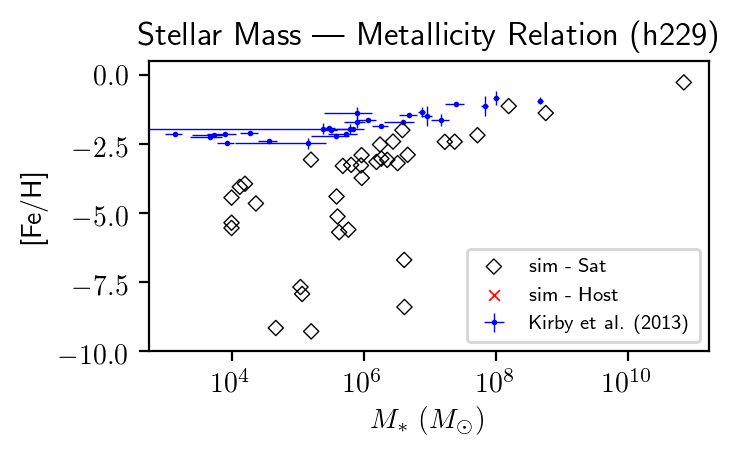

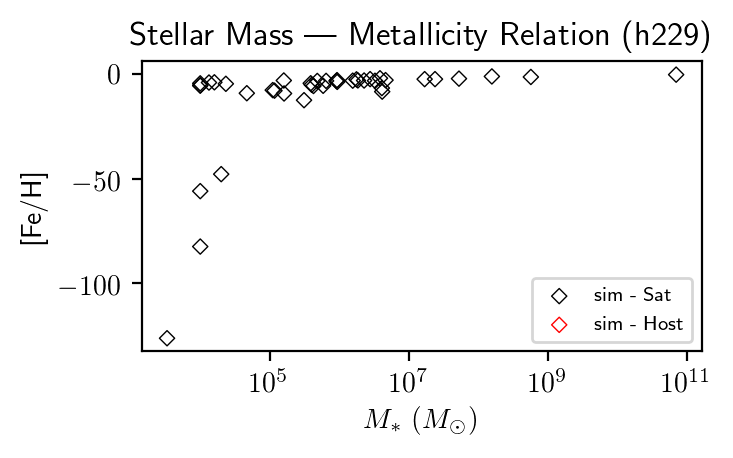

In [21]:
mpl.rc('text', usetex=True)

plt.figure(figsize=(4,2.5),dpi=200)
plt.scatter(sat_SM,sat_Z,marker='D',linewidth=0.5,s=15,facecolors='none',edgecolors='k',label='sim - Sat',zorder=15)
plt.scatter(host_SM,host_Z,marker='x',linewidth=0.6,s=15,facecolors='r',edgecolors='none',label='sim - Host',zorder=10)
plt.errorbar(Kirby_SM,Kirby_feh,xerr=Kirby_SMerr,yerr=Kirby_feherr,
             fmt='o', marker='o', ms=2,lw=0.5,mew=0.3,mfc='b',mec='none',ecolor='b',label='Kirby et al. (2013)',zorder=5)
plt.semilogx()
plt.ylim(-10,0.5)
plt.xlabel(r'$M_* \ (M_{\odot})$')
plt.ylabel(r'[Fe/H]')
plt.title('Stellar Mass — Metallicity Relation (%s)' % simname)
plt.legend(loc=4,prop={'size': 7})
plt.gcf().subplots_adjust(bottom=0.3)
plt.gcf().subplots_adjust(left=0.2)
plt.savefig('../Plots/smz_iron_zoomed_%s.png' % simname,dpi=300)
plt.show()

plt.figure(figsize=(4,2.5),dpi=200)
plt.scatter(sat_SM,sat_Z,marker='D',linewidth=0.5,s=15,facecolors='none',edgecolors='k',label='sim - Sat',zorder=15)
plt.scatter(host_SM,host_Z,marker='D',linewidth=0.5,s=15,facecolors='none',edgecolors='r',label='sim - Host',zorder=10)
plt.semilogx()
plt.xlabel(r'$M_* \ (M_{\odot})$')
plt.ylabel(r'[Fe/H]')
plt.title('Stellar Mass — Metallicity Relation (%s)' % simname)
plt.legend(loc=4,prop={'size': 7})
plt.gcf().subplots_adjust(bottom=0.3)
plt.gcf().subplots_adjust(left=0.2)
plt.savefig('../Plots/smz_iron_%s.png' % simname,dpi=300)
plt.show()

